In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

Using TensorFlow backend.


In [3]:
path = "/data/twitter_screenshots/"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
twitter = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg') or file.name.endswith('.png'):
          # adds only the image files to the flowers list
            twitter.append(file.name)

In [4]:
non_path = "/data/randomimage/"
# change the working directory to the path where the images are located
os.chdir(non_path)

# this list holds all the image filename
non_twitter = []

# creates a ScandirIterator aliased as files
with os.scandir(non_path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg') or file.name.endswith('.png'):
          # adds only the image files to the flowers list
            non_twitter.append(file.name)

In [5]:
other_platforms_path = "/data/other_platforms/"
# change the working directory to the path where the images are located
os.chdir(other_platforms_path)

# this list holds all the image filename
other_platforms = []

# creates a ScandirIterator aliased as files
with os.scandir(other_platforms_path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg') or file.name.endswith('.png'):
          # adds only the image files to the flowers list
            other_platforms.append(file.name)

In [6]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

2023-03-29 00:22:47.483589: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-03-29 00:22:47.514456: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f861f9d9c90 executing computations on platform Host. Devices:
2023-03-29 00:22:47.514483: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [7]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [8]:
data = {}
labels = {}

In [9]:
# lop through each image in the dataset
for t in twitter[:500]:
    # try to extract the features and update the dictionary
#     try:
        feat = extract_features(path+t,model)
        data[t] = feat
        labels[t] = 1
    # if something fails, save the extracted features as a pickle file (optional)
#     except:
#         with open(p,'wb') as file:
#             pickle.dump(data,file)

In [10]:
# lop through each image in the dataset
for t in non_twitter[:500]:
    # try to extract the features and update the dictionary
#     try:
        feat = extract_features(non_path+t,model)
        data[t] = feat
        labels[t] = 0
    # if something fails, save the extracted features as a pickle file (optional)
#     except:
#         with open(p,'wb') as file:
#             pickle.dump(data,file)

In [11]:
# lop through each image in the dataset
for t in other_platforms[:500]:
    # try to extract the features and update the dictionary
#     try:
        feat = extract_features(other_platforms_path+t,model)
        data[t] = feat
        labels[t] = 2
    # if something fails, save the extracted features as a pickle file (optional)
#     except:
#         with open(p,'wb') as file:
#             pickle.dump(data,file)

In [12]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
print(feat.shape)
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)

labels_ordered = np.array([labels[t] for t in filenames])
# get the unique labels (from the twitter_labels.csv)
# df = pd.read_csv('twitter_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))
unique_labels = [0, 1, 2]
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=2, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
# pca_results_0 = [x[0]]
# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(feat)
clusters = kmeans.labels_


(1314, 1, 4096)
(1314, 4096)


In [13]:
feat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.334256  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.1294127 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.5679152 ],
       ...,
       [0.        , 4.0300736 , 1.7082306 , ..., 1.7494102 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27767438, ..., 0.        , 0.        ,
        2.1707804 ],
       [0.        , 0.        , 0.        , ..., 2.5570982 , 0.        ,
        0.        ]], dtype=float32)

In [14]:
labels_ordered

array([1, 1, 1, ..., 2, 2, 2])

In [15]:
x

array([[  4.65946 , -20.236666],
       [  9.461799, -22.068604],
       [  7.355707, -22.32107 ],
       ...,
       [ 21.370531,  28.683508],
       [  7.071142, -20.807577],
       [ 28.773184,  16.780981]], dtype=float32)

In [16]:
clusters

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [17]:
results_df = pd.DataFrame({'filename': filenames, 'label': labels_ordered, 'cluster': clusters, 'pca_0': x[:,0], 'pca_1': x[:,1]})

In [18]:
results_df

,filename,label,cluster,pca_0,pca_1
0,@anyuser_1495977824922275840_tweetcapture.png,1,1,4.659460,-20.236666
1,@anyuser_1495977674862387207_tweetcapture.png,1,1,9.461799,-22.068604
2,@anyuser_1495977624665227264_tweetcapture.png,1,1,7.355707,-22.321070
3,@anyuser_1495977945592393729_tweetcapture.png,1,1,14.544272,-18.443419
4,@anyuser_1495977564728442882_tweetcapture.png,1,1,9.138850,-17.811939
...,...,...,...,...,...
1309,1_WA.jpg,2,2,17.084152,8.234944
1310,85.jpg,2,1,-2.488051,-17.454521
1311,52.jpg,2,2,21.370531,28.683508
1312,0.jpg,2,1,7.071142,-20.807577


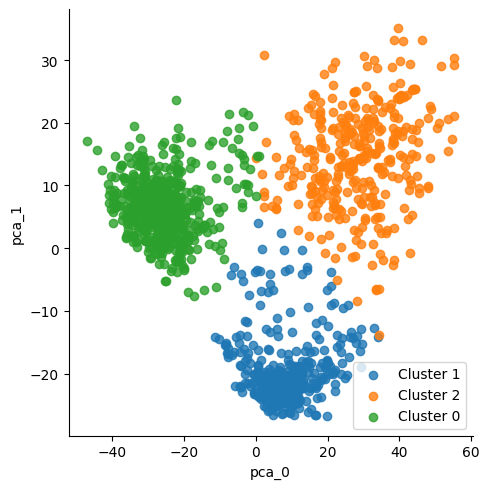

In [19]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

cluster_str = results_df['cluster'].replace({0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'})
results_df_cluster = results_df
results_df_cluster['cluster'] = list(cluster_str)
# give a list to the marker argument
sns.lmplot( x="pca_0", y="pca_1", data=results_df_cluster, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

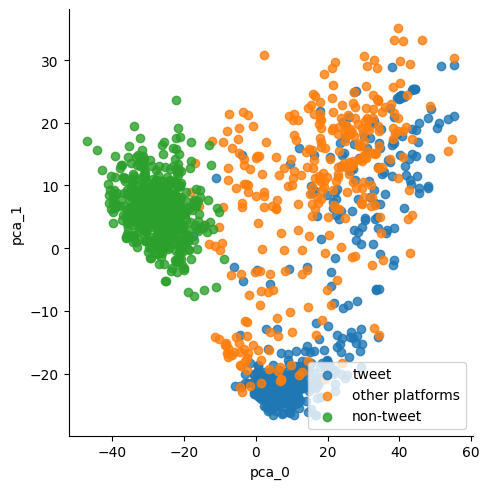

In [20]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# give a list to the marker argument
labels_str = results_df['label'].replace({2:'other platforms' , 1: 'tweet', 0: 'non-tweet'})
results_df_label = results_df
results_df_label['label'] = list(labels_str)
sns.lmplot( x="pca_0", y="pca_1", data=results_df_label, fit_reg=False, hue='label', legend=False,
           palette={'other platforms':sns.color_palette()[1], 'tweet':sns.color_palette()[0], 'non-tweet':sns.color_palette()[2]})
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [21]:
results_df.head()

,filename,label,cluster,pca_0,pca_1
0,@anyuser_1495977824922275840_tweetcapture.png,tweet,Cluster 1,4.659460,-20.236666
1,@anyuser_1495977674862387207_tweetcapture.png,tweet,Cluster 1,9.461799,-22.068604
2,@anyuser_1495977624665227264_tweetcapture.png,tweet,Cluster 1,7.355707,-22.321070
3,@anyuser_1495977945592393729_tweetcapture.png,tweet,Cluster 1,14.544272,-18.443419
4,@anyuser_1495977564728442882_tweetcapture.png,tweet,Cluster 1,9.138850,-17.811939


In [22]:
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [23]:
preds = list(cluster_str.replace({'Cluster 0': 0, 'Cluster 1': 1, 'Cluster 2': 2}))
trues = list(labels_str.replace({'non-tweet': 0, 'tweet': 1, 'other platforms': 2}))

In [24]:
import numpy as np
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
centroids = kmeans.cluster_centers_

# calculate distance to each cluster center, 1/distance is used as prob
probs = []
for i in range(len(results_df)):
    x = feat[i]
    prob_dummy = [1/np.linalg.norm(x-c) for c in centroids]
    probs.append(prob_dummy)

In [25]:
probs = np.array(probs)
probs_norm = probs/np.sum(probs, axis=1,keepdims=True)

In [26]:
centroids

array([[2.77234733e-01, 5.92257082e-01, 5.18656433e-01, ...,
        5.12101054e-01, 5.54672658e-01, 5.01154244e-01],
       [2.67371461e-02, 1.06354296e-01, 6.46581799e-02, ...,
        1.09477520e-01, 1.88691914e-03, 2.24347401e+00],
       [3.93802226e-02, 1.99046707e+00, 3.04995686e-01, ...,
        1.68727994e+00, 4.26976383e-03, 7.29754329e-01]], dtype=float32)

In [27]:
preds

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,


In [28]:
trues

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [29]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

print(
    'ROC AUC Score:', roc_auc_score(trues, probs_norm, multi_class='ovr'),
    ', Accuracy Score:', accuracy_score(trues, preds), ', F1 Score:', f1_score(trues, preds, average='macro')
    , ', Precision Score:', precision_score(trues, preds, average='macro'), ', Recall Score:', recall_score(trues, preds, average='macro'))

ROC AUC Score: 0.864701396688075 , Accuracy Score: 0.8082191780821918 , F1 Score: 0.7857428045112735 , Precision Score: 0.78556282666805 , Recall Score: 0.790375
